DATASET: https://www.kaggle.com/datasets/muratkokludataset/dry-bean-dataset

# BUSSINES UNDERSTANDING

Bagi mereka yang suka bercocok tanam ataupun mereka yang menjual biji kering/bibit sangatlah perlu pandai dalam mengklasifikasi atau membedakan mana biji A dan mana biji B.

Terkadang hal tersebut menjadi hal yang sulit terlebih untuk pemula dikarenakan bentuk nya yang terkadang tidak beda jauh.

Maka dari itu, perlu dibuatkannya model yang mempermudah dalam melakukan proses klasifikasi biji kering tersebut, dengan adanya permasalahan yang sebelumnya disebutkan. Model ini dibuat menggunakan metode klasifikasi dengan algoritma SVM.

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

2. Load Dataset

In [4]:
df = pd.read_excel('Dry_Bean_Dataset.xlsx')

# DATA UNDERSTANDING

Informasi Atribut:

Area (A): Area zona Biji Kering dan jumlah piksel di dalam batas-batasnya.

Perimeter (P): Keliling Biji Kering didefinisikan sebagai panjang batasnya.

MajorAxisLength (L): Jarak antara ujung garis terpanjang yang dapat ditarik dari sebuah bean.

MinorAxisLength (l): Garis terpanjang yang bisa ditarik dari Biji Kering sambil berdiri tegak lurus pada sumbu utama.

AspectRation (K): Menentukan hubungan antara L dan l.

Eccentricity (Ec): Eksentrisitas elips yang memiliki momen yang sama dengan wilayahnya.

ConvexArea (C): Jumlah piksel dalam poligon cembung terkecil yang dapat memuat area biji Biji Kering.

EquivDiameter (Ed): Diameter lingkaran yang memiliki area yang sama dengan area biji Biji Kering.

Extent (Ex): Rasio piksel dalam kotak pembatas terhadap area biji.

Solidity (S): Juga dikenal sebagai konveksitas. Rasio piksel dalam cangkang cembung dengan piksel yang ditemukan dalam biji.

roundness (R): Dihitung dengan rumus berikut ini: (4piA) / (P^2)

Compactness (CO): Mengukur kebulatan suatu benda: Ed/L

ShapeFactor1 (SF1)

ShapeFactor2 (SF2)

ShapeFactor3 (SF3)

ShapeFactor4 (SF4)

Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz dan Sira)

In [5]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [6]:
df.shape

(13611, 17)

In [7]:
df.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

In [8]:
df['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

In [9]:
df['Class'].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

# DATA PREPARATION

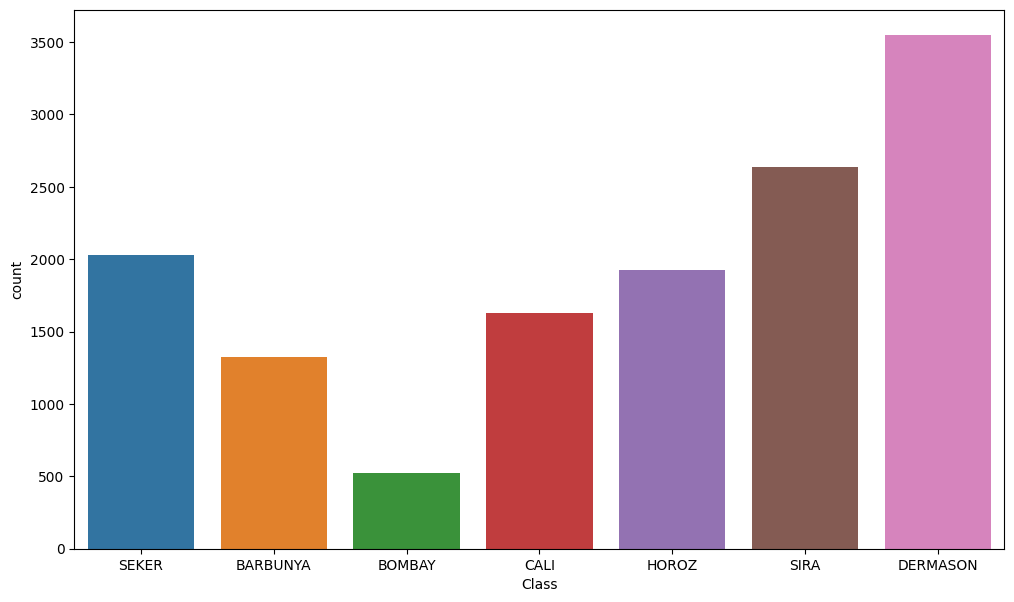

In [10]:
plt.figure(figsize=(12,7))
sns.countplot(x='Class', data=df)
plt.show()

In [11]:
df.replace(('SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'),
           (0,1,2,3,4,5,6), inplace=True)

In [12]:
df.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

In [13]:
df = df.drop(['ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4'], axis=1)

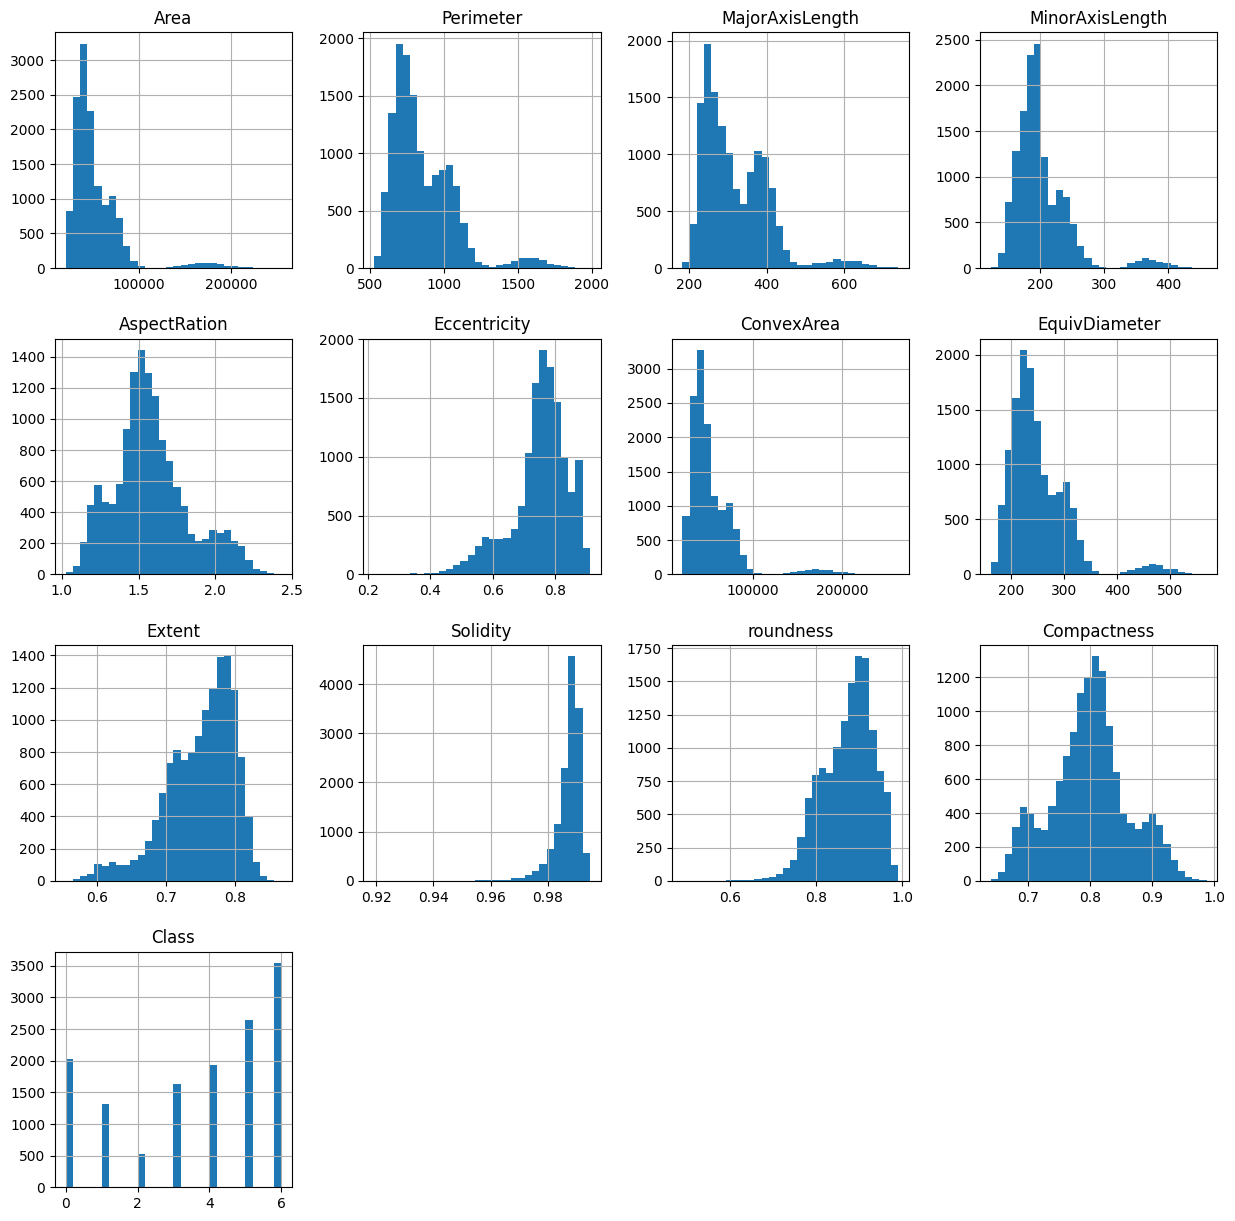

In [14]:
df.hist(bins=30, figsize=(15,15))
plt.show()

# MODELLING

In [15]:
# memisahkan data dan label
X = df.drop (columns='Class', axis=1)
Y = df['Class']

In [16]:
print(X)

        Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395    610.291       208.178117       173.888747      1.197191   
1      28734    638.018       200.524796       182.734419      1.097356   
2      29380    624.110       212.826130       175.931143      1.209713   
3      30008    645.884       210.557999       182.516516      1.153638   
4      30140    620.134       201.847882       190.279279      1.060798   
...      ...        ...              ...              ...           ...   
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.187979      1.472582   
13609  42147    763.779       283.382636       190.275731      1.489326   
13610  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0          0.54981

In [17]:
print(Y)

0        0
1        0
2        0
3        0
4        0
        ..
13606    6
13607    6
13608    6
13609    6
13610    6
Name: Class, Length: 13611, dtype: int64


3. Standarisasi Data

In [18]:
scaler = StandardScaler()

In [19]:
scaler.fit(X)

StandardScaler()

In [20]:
standarized_data = scaler.transform(X)

In [21]:
print(standarized_data)

[[-0.84074853 -1.1433189  -1.30659814 ...  0.36761343  1.42386707
   1.8391164 ]
 [-0.82918764 -1.01392388 -1.39591111 ... -0.46290658  0.23105404
   2.49544929]
 [-0.80715717 -1.07882906 -1.25235661 ...  0.51841687  1.25286494
   1.76484275]
 ...
 [-0.37203825 -0.44783294 -0.45047814 ...  0.5913704   0.7584678
   0.37053278]
 [-0.37176543 -0.42702856 -0.42897404 ...  0.14371712  0.5817534
   0.28509849]
 [-0.37135619 -0.38755718 -0.2917356  ...  0.53753905  0.25368146
  -0.24090425]]


In [22]:
X = standarized_data
Y = df['Class']

In [23]:
print(X)
print(Y)

[[-0.84074853 -1.1433189  -1.30659814 ...  0.36761343  1.42386707
   1.8391164 ]
 [-0.82918764 -1.01392388 -1.39591111 ... -0.46290658  0.23105404
   2.49544929]
 [-0.80715717 -1.07882906 -1.25235661 ...  0.51841687  1.25286494
   1.76484275]
 ...
 [-0.37203825 -0.44783294 -0.45047814 ...  0.5913704   0.7584678
   0.37053278]
 [-0.37176543 -0.42702856 -0.42897404 ...  0.14371712  0.5817534
   0.28509849]
 [-0.37135619 -0.38755718 -0.2917356  ...  0.53753905  0.25368146
  -0.24090425]]
0        0
1        0
2        0
3        0
4        0
        ..
13606    6
13607    6
13608    6
13609    6
13610    6
Name: Class, Length: 13611, dtype: int64


4. Memisahkan Data Training dan Data Testing

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, stratify=Y, random_state=2)

In [25]:
print(X.shape, X_train.shape, X_test.shape)

(13611, 12) (10888, 12) (2723, 12)


5. Membuat data latih menggunakan algoritma SVM

In [26]:
classifier = svm.SVC(kernel='linear')

In [27]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

6. membuat model evaluasi untuk mengukur tingkat akurasi

In [28]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [29]:
print('Akurasi data training adalah = ', training_data_accuracy)

Akurasi data training adalah =  0.9189015429831007


In [30]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [31]:
print('Akurasi data testing adalah = ', test_data_accuracy)

Akurasi data testing adalah =  0.9188395152405435


In [32]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0


# EVALUATION

7. Membuat Model Prediksi

In [33]:
input_data = (28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,
              190.141097,0.763923,0.988856,0.958027,0.913358)

input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

std_data = scaler.transform(input_data_reshape)
print(std_data)

prediction = classifier.predict(std_data)
print()
print(prediction)
print()
if (prediction[0] == 0):
    print('Biji Kering tersebut termasuk kedalam kategori Seker')
elif (prediction[0] == 1):
    print('Biji Kering tersebut termasuk kedalam kategori Barbunya')
elif (prediction[0] == 2):
    print('Biji Kering tersebut termasuk kedalam kategori Bombay')
elif (prediction[0] == 3):
    print('Biji Kering tersebut termasuk kedalam kategori Cali')
elif (prediction[0] == 4):
    print('Biji Kering tersebut termasuk kedalam kategori Horoz')
elif (prediction[0] == 5):
    print('Biji Kering tersebut termasuk kedalam kategori Sira')
else :
    print('Biji Kering tersebut termasuk kedalam kategori Dermason')

[[-0.84074853 -1.1433189  -1.30659813 -0.63115304 -1.56505423 -2.18572242
  -0.84145059 -1.0633406   0.28909726  0.36761373  1.42386494  1.83912038]]

[0]

Biji Kering tersebut termasuk kedalam kategori Seker


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# SAVE MODEL

8. simpan model

In [34]:
import pickle

In [35]:
filename = 'Dry_Bean.sav'
pickle.dump(classifier, open(filename,'wb'))
pickle.dump(scaler, open('scaler.sav','wb'))